In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn

## Method 1: Using Normal Equation 

Calculate the optimal weights 
$W = (X^TX)^{-1} X^T y$

Put them in the y_prediction equation
$\hat y = XW + B$

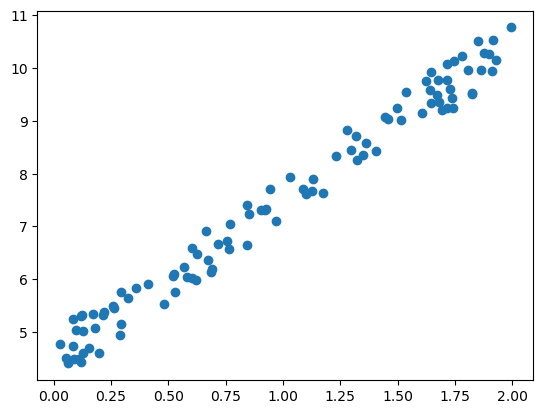

In [2]:
# generate dataset
X = 2 * np.random.rand(100, 1)
y = 4 + 3* X + np.random.rand(100, 1)
plt.scatter(X, y)
plt.show()

In [3]:
# calculating weights through Normal Equation

bias = np.ones((100, 1))
X_b = np.c_[bias, X] # features + bias
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # normalization equation for calculating weights 

In [4]:
theta_best

array([[4.49214865],
       [3.01607465]])

In [5]:
# make new predictions using the weights

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # X + b
y_predict = X_new_b.dot(theta_best) # y = WX + b
y_predict

array([[ 4.49214865],
       [10.52429796]])

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.coef_, lin_reg.intercept_)
# lin_reg.intercept_ gives the learned bias (b), and lin_reg.coef_ gives the learned weights (W) for the features.
# You can use them to manually compute predictions:
# y_manual = lin_reg.intercept_ + np.dot(X_new, lin_reg.coef_.T)

# To make new predictions like y_pred, use X_new as input to lin_reg.predict
y_pred_new = lin_reg.predict(X_new)
y_pred_new



[[3.01607465]] [4.49214865]


array([[ 4.49214865],
       [10.52429796]])

In [8]:
lin_reg.predict(X_new)

array([[ 4.49214865],
       [10.52429796]])

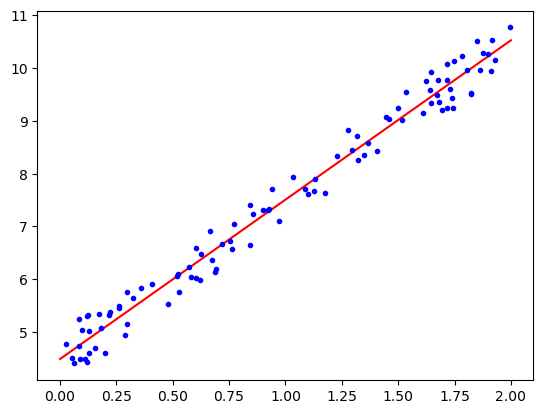

In [9]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')

## Method 2: Gradient Descent

### Batch Gradient Descent

$\hat y = XW + b$

Cost Function:

$J(W, b) = \frac{1}{m} \sum\limits_{i=1}^{m}(y_i - (X_i W + b))^2$ 


Compute Slopes:

$\frac{\partial J}{\partial W} = \frac{2}{m} X^T(\hat y - y)$ 

$\frac{\partial J}{\partial b} = \frac{2}{m} \sum(\hat y - y)$ 


Update Parameters:

$W := W - \alpha \frac{\partial J}{\partial W}$

$b := b - \alpha \frac{\partial J}{\partial b}$

Learned W: [[3.04031673]]
Learned b: 4.463149478146078


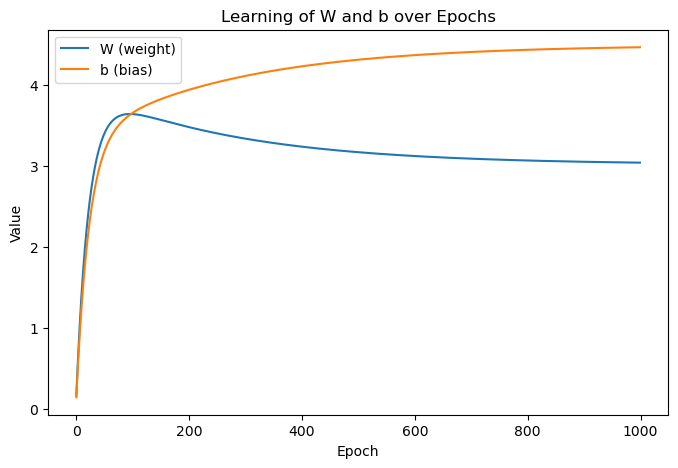

In [10]:
# Initialize
W = np.zeros((1, 1))  # One weight per feature
b = 0
alpha = 0.01
epochs = 1000
m = X.shape[0]

W_history = []
b_history = []

for i in range(epochs):
    y_pred = X.dot(W) + b
    error = y_pred - y
    
    dW = (2/m) * X.T.dot(error)
    db = (2/m) * np.sum(error)
    
    W -= alpha * dW
    b -= alpha * db
    W_history.append(W[0, 0])  # store scalar value
    b_history.append(b)

print("Learned W:", W)
print("Learned b:", b)

# Plotting the learning of W and b
plt.figure(figsize=(8,5))
plt.plot(W_history, label='W (weight)')
plt.plot(b_history, label='b (bias)')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Learning of W and b over Epochs')
plt.legend()
plt.show()

In [11]:
alpha = 0.05
theta = np.random.randn(2, 1)

for i in range(epochs):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients

theta

array([[4.49214864],
       [3.01607466]])

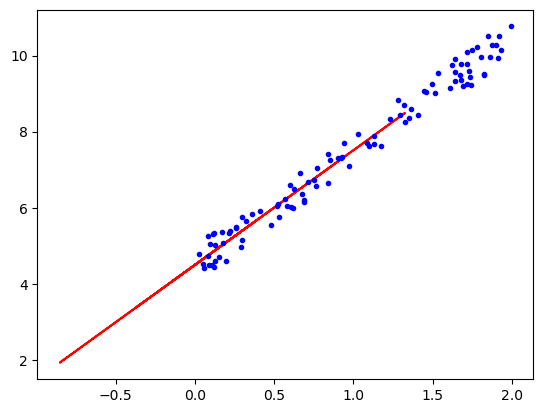

In [12]:
# make new predictions using the weights

X_new = np.random.randn(10, 1)
X_new_b = np.c_[np.ones((10,1)), X_new] # X + b
y_predict = X_new_b.dot(theta) # y = WX + b

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')

### Stochastic Gradient Descent

Instead of using all the features at once to compute the gradients, <br>
we select a random paramter and compute the gradients on it, then update the params.

We keep the learning rate high at first and then slowly reduce it, <br>
this allows us to explore and get out of local minimas at the beginning<br>
and settle down in the global minimas towards the end. <br>
The function that determines the learning rate at each iteration is called learning_schedule

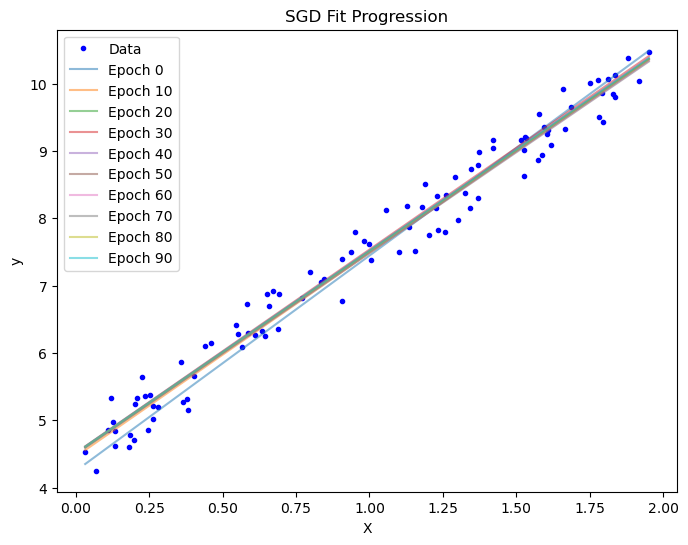

In [161]:
epochs = 100
t0 = 5
t1 = 100


# t0 (numerator): Sets the initial learning rate. A higher t0 means a higher starting learning rate.
# t1 (denominator offset): Controls how quickly the learning rate decreases. A higher t1 makes the learning rate decrease more slowly.
# t: The current iteration (epoch × samples per epoch + sample index).
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)
theta_history = []

total_params = m
for epoch in range(epochs):
    for i in range(total_params):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # gradients for that specific param
        alpha = learning_schedule(epoch * m + i)
        theta = theta - alpha * gradients
    theta_history.append(theta.copy())


# Plotting
plt.figure(figsize=(8,6))
plt.plot(X, y, "b.", label="Data")
x_range = np.linspace(X.min(), X.max(), 100)
x_range_b = np.c_[np.ones((100, 1)), x_range.reshape(-1, 1)]

for i, th in enumerate(theta_history[::max(1, epochs//10)]):  # Plot every ~10th epoch
    y_line = x_range_b.dot(th)
    plt.plot(x_range, y_line, alpha=0.5, label=f"Epoch {i * (epochs//10)}")

plt.xlabel("X")
plt.ylabel("y")
plt.title("SGD Fit Progression")
plt.legend()
plt.show()

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) # eta is just alpha (learning rate)
sgd_reg.fit(X, y.ravel()) # y.ravel() returns a flattened array
sgd_reg.intercept_, sgd_reg.coef_


(array([4.49184212]), array([3.04814938]))

In [14]:
y_pred = sgd_reg.predict(X)
y_manual = X.dot(sgd_reg.coef_) + sgd_reg.intercept_

### Mini-batch Gradient Descent

compute gradients of small random sets of instances

Learned theta (mini-batch): [[4.49544028]
 [3.01797845]]


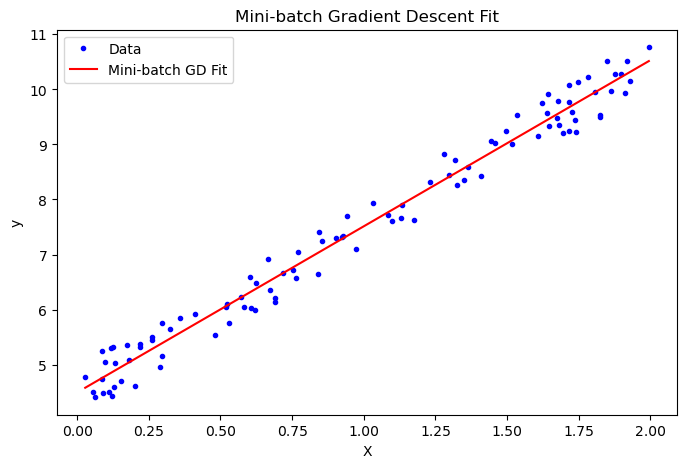

In [15]:
# Mini-batch Gradient Descent Implementation
np.random.seed(42)

batch_size = 20
n_epochs = 100
learning_rate = 0.1

# Add bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize theta
theta = np.random.randn(2, 1)

m = X_b.shape[0]

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate * gradients

print("Learned theta (mini-batch):", theta)

# Plot the result
plt.figure(figsize=(8,5))
plt.plot(X, y, "b.", label="Data")
x_range = np.linspace(X.min(), X.max(), 100)
x_range_b = np.c_[np.ones((100, 1)), x_range.reshape(-1, 1)]
y_line = x_range_b.dot(theta)
plt.plot(x_range, y_line, "r-", label="Mini-batch GD Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Mini-batch Gradient Descent Fit")
plt.legend()
plt.show()